In [90]:
#imports 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
sns.set_theme(style="whitegrid")
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
df.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [4]:
df.describe()

BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000

In [5]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [11]:
#extract month from Posted On to create a new columns month
#df['month'] = pd.DatetimeIndex(df['Posted On']).month
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['Month'] = df['Date'].dt.month_name()
df.Month.unique()

array(['May', 'July', 'April', 'June'], dtype=object)

In [12]:
df.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0 2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1 2022-05-13    2  20000   800       1 out of 3   Super Area   
2 2022-05-16    2  17000  1000       1 out of 3   Super Area   
3 2022-07-04    2  10000   800       1 out of 2   Super Area   
4 2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  month       Date Month  
0         2    Contact Owner      5 2022-05-18   May  
1         1    Contact Owner      5 2022-05-13   May  
2         1    Contact Owner      5 2022-05-16   May  
3         1    Contact Owner      7 2022-07-04  July  
4         1    Contact Owner      5 2022-05-09   May

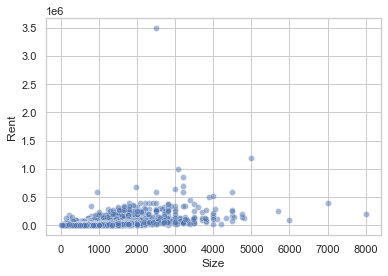

In [63]:
sns.scatterplot(data=df, x="Size", y="Rent", alpha=.5)

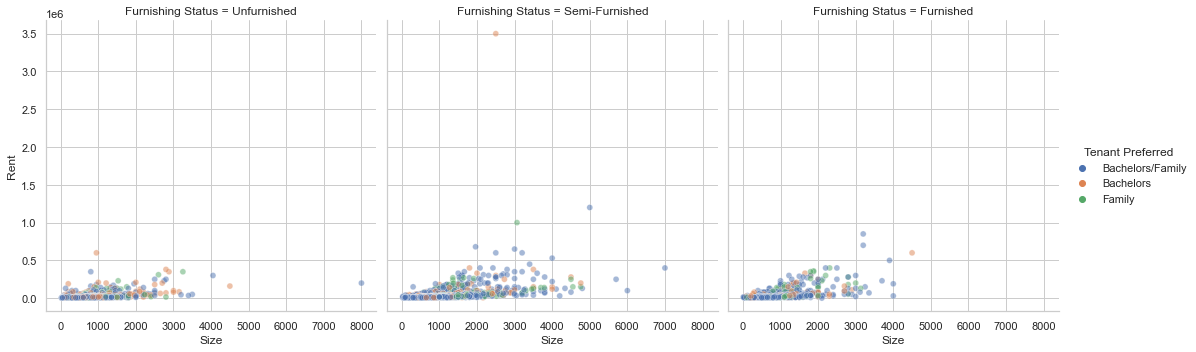

In [69]:
#distribution of rents by Size, Furnishing Status, and preferrence
sns.relplot(
    data=df, x = 'Size' , y = 'Rent', alpha = .5, col = 'Furnishing Status', kind="scatter", 
    hue = 'Tenant Preferred'
)

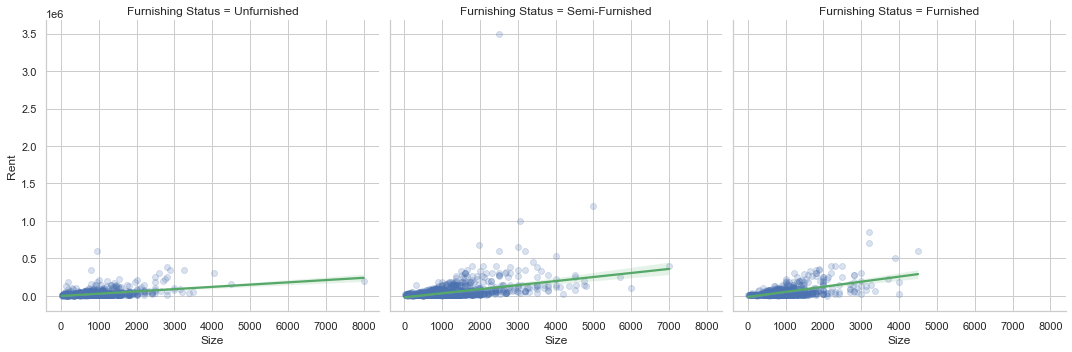

In [53]:
sns.lmplot(x = 'Size', y = 'Rent', col = "Furnishing Status", data = df, 
           line_kws={'color': 'g'}, scatter_kws={'alpha':0.2})

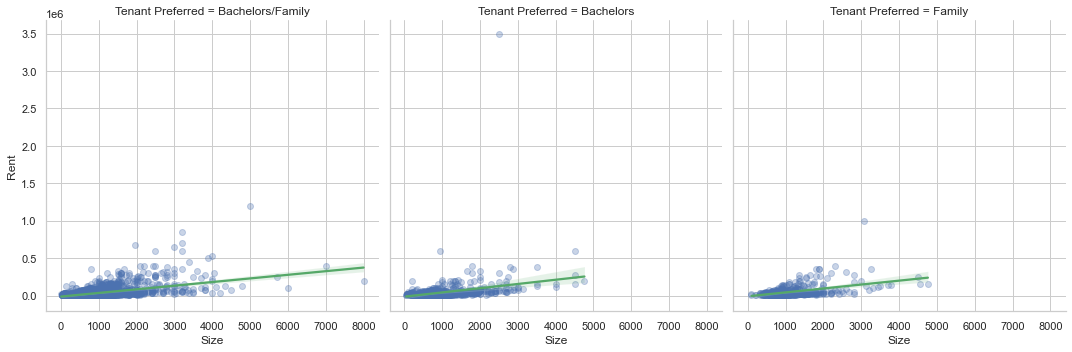

In [71]:
sns.lmplot(x = 'Size', y = 'Rent', col = 'Tenant Preferred', 
           data = df, line_kws={'color': 'g'}, scatter_kws={'alpha':0.3})

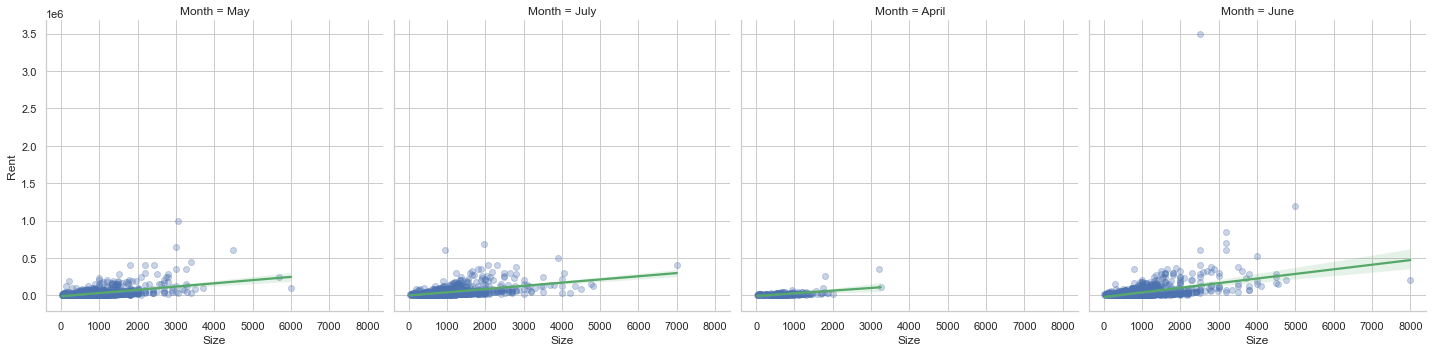

In [55]:
sns.lmplot(x = 'Size', y = 'Rent', col = 'Month', data = df, line_kws={'color': 'g'}, scatter_kws={'alpha':0.3})

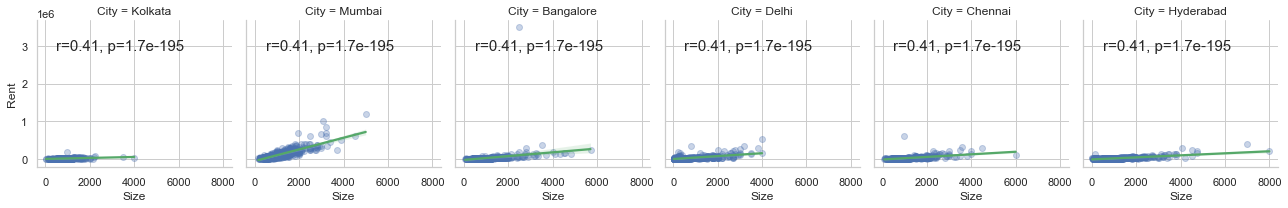

In [56]:
plot_r2 = sns.lmplot(x = 'Size', y = 'Rent', data = df, col = 'City',
                     line_kws={'color': 'g'}, scatter_kws={'alpha':0.3}, height=3, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(df['Size'], df['Rent'])
    ax = plt.gca()
    ax.text(.1, .8, 'r={:.2f}, p={:.2g}'.format(r, p), transform=ax.transAxes, fontsize=15)
    
plot_r2.map_dataframe(annotate)
plt.show()

In [ ]:
#model with only numerical features: Bathroom, Bedroom, Size 

In [80]:
X = df[['BHK', 'Bathroom', 'Size']].to_numpy()
y = df[['Rent']].to_numpy()

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.20, random_state=123)

In [129]:
model_1 = LinearRegression(fit_intercept=False)

model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

In [134]:
print("Model slopes:    ", model_1.coef_[0])

Model slopes:     [ 2.11168207e+03  1.17182150e+04  4.04066406e+01 -1.76557514e+04
 -2.14480916e+03  5.48365348e+04 -1.72804372e+04 -1.76585091e+04
 -1.37151356e+04 -1.68664390e+04 -1.67390694e+04 -2.41212543e+04
 -2.46601971e+04]
Model intercept: 0.0


In [97]:
mean_squared_error(y_test, y_pred)

2859914271.3789177

In [99]:
#model with added categorical features: City, Month, Furnishing Status
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [108]:
categorical_cols = ['City', 'Month', 'Furnishing Status']
df2 = pd.get_dummies(df, columns=categorical_cols)
df2.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0 2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1 2022-05-13    2  20000   800       1 out of 3   Super Area   
2 2022-05-16    2  17000  1000       1 out of 3   Super Area   
3 2022-07-04    2  10000   800       1 out of 2   Super Area   
4 2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality  Tenant Preferred  Bathroom Point of Contact  ...  \
0                    Bandel  Bachelors/Family         2    Contact Owner  ...   
1  Phool Bagan, Kankurgachi  Bachelors/Family         1    Contact Owner  ...   
2   Salt Lake City Sector 2  Bachelors/Family         1    Contact Owner  ...   
3               Dumdum Park  Bachelors/Family         1    Contact Owner  ...   
4             South Dum Dum         Bachelors         1    Contact Owner  ...   

   City_Hyderabad City_Kolkata  City_Mumbai  Month_April  Month_July  \
0               0            1            0            0           0   
1               0            1            0            0           0   
2               0            1            0            0           0   
3               0            1            0            0           1   
4               0            1            0            0           0   

   Month_June  Month_May  Furnishing Status_Furnished  \
0           0          1                            0   
1           0          1                            0   
2           0          1                            0   
3           0          0                            0   
4           0          1                            0   

   Furnishing Status_Semi-Furnished  Furnishing Status_Unfurnished  
0                                 0                              1  
1                                 1                              0  
2                                 1                              0  
3                                 0                              1  
4                                 0                              1  

[5 rows x 25 columns]

In [121]:
X2 = pd.concat([df[['BHK', 'Bathroom', 'Size']], df2[df2.columns[15:25]]], axis=1, ignore_index=True).to_numpy()

In [122]:
X2

array([[   2,    2, 1100, ...,    0,    0,    1],
       [   2,    1,  800, ...,    0,    1,    0],
       [   2,    1, 1000, ...,    0,    1,    0],
       ...,
       [   3,    3, 1750, ...,    0,    1,    0],
       [   3,    2, 1500, ...,    0,    1,    0],
       [   2,    2, 1000, ...,    0,    0,    1]])

In [123]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.20, random_state=123)

In [130]:
model_1.fit(X2_train, y2_train)
y2_pred = model_1.predict(X2_test)

In [131]:
print("Model slopes:    ", model_1.coef_[0])

Model slopes:     [ 2.11168207e+03  1.17182150e+04  4.04066406e+01 -1.76557514e+04
 -2.14480916e+03  5.48365348e+04 -1.72804372e+04 -1.76585091e+04
 -1.37151356e+04 -1.68664390e+04 -1.67390694e+04 -2.41212543e+04
 -2.46601971e+04]
Model intercept: 0.0


In [133]:
mean_squared_error(y2_test, y2_pred)

2098611752.4164705

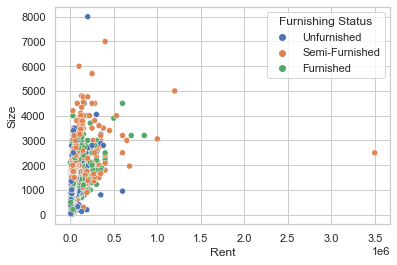

In [20]:
sns.scatterplot(data=df, x="Rent", y="Size", hue='Furnishing Status')